## Potencial de un cascarón esférico con potenciales unitarios de signos opuestos.

$$
\phi(x,r) = \sum_{n=0}^{\infty} A_n r^{-(n+1)}P_n(x)
$$

$$
A_n = (2n+1) \int_0^1 P_n(x) dx \;\;\; n \; impar.
$$

\begin{equation}
 \phi_a(r,\theta) = \sum_{m=0}^{\infty} (-\frac{1}{2})^{m} \frac{(4m+3)(2m-1)!!}{2(m+1)!} (\frac{r}{a})^{-(2m+2)} P_{2m+1}(\cos(\theta))
\end{equation}



In [1]:
#import Pkg; 
#Pkg.add("LegendrePolynomials")
using LegendrePolynomials
using Plots

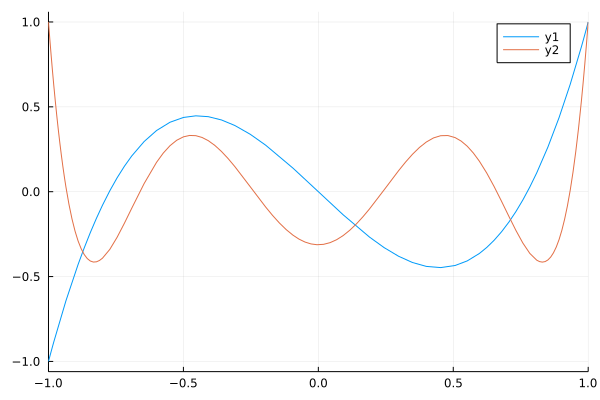

In [2]:
plot(x->Pl(x,3),xlim=(-1,1))
plot!(x->Pl(x,6))

In [3]:
function dblfactorial(n::Integer)
    n < 0 && iseven(n) && throw(DomainError(n, "`n` must be nonnegative."))
    if n < 0 # and so is odd
        s = abs(n)
        return (-1)^((s-1)/2)*s//dblfactorial(s)
    end
    f::typeof(n*n) = 1
    if iseven(n)
        for i::typeof(n*n) = 1:n÷2
            f *= 2i
        end
    else
        for i::typeof(n*n) = 1:(n-1)÷2
            f *= 2*i+1
        end
    end
    return f
end

dblfactorial (generic function with 1 method)

In [9]:
function ϕ(x,r,A)
    v = 0
    N = length(A)
    for i in 1:N
        v = v + A[i]*Pl(x, 2i-1)/r^(2i) 
    end
    return v
end

N = 21

A = [(-1/2)^(i-1) *(4i - 1)*dblfactorial(big(2i-3))/2/factorial(big(i)) for i in 1:N]

21-element Vector{BigFloat}:
  1.5
 -0.875
  0.6875
 -0.5859375
  0.51953125
 -0.4716796875
  0.43505859375
 -0.405853271484375
  0.3818511962890625
 -0.361667633056640625
  0.3443851470947265625
 -0.3293683528900146484375
  0.31616127490997314453125
 -0.3044269979000091552734375
  0.29391042888164520263671875
 -0.2844143821857869625091552734375
  0.27578369365073740482330322265625
 -0.2678943591308780014514923095703125
  0.26064592020702548325061798095703125
 -0.25395600825504516251385211944580078125
  0.247756358867263770662248134613037109375

In [15]:
dx = 0.0001
xv = 0.0:dx:1.
AN = [(4i-1)*(sum(Pl.(xv,2i-1)) - 0.5*Pl.(1,2i-1))/length(xv) for i in 1:N];
            

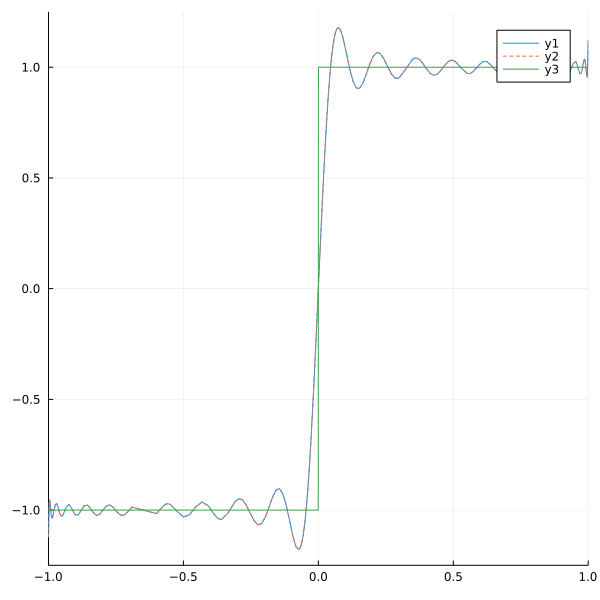

In [16]:
x = 0.0:0.02:1.
plot(x -> ϕ(x,1,A), xlim=(-1,1))
plot!(x -> ϕ(x,1,AN), linestyle=:dash)
plot!(x -> x < 0 ? -1 : 1)

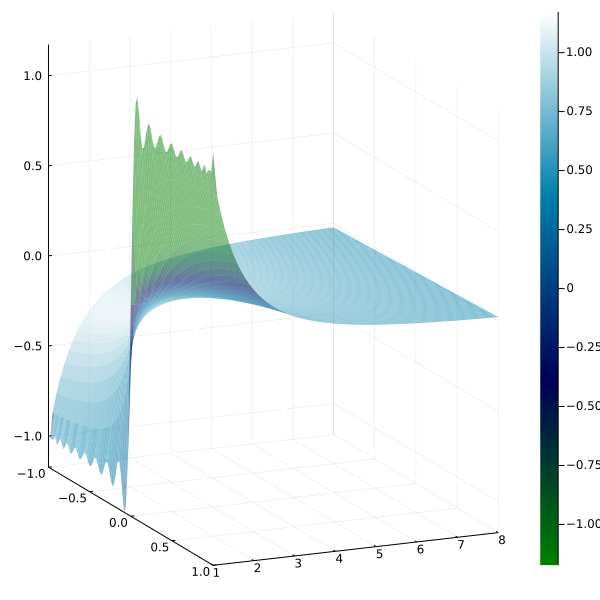

In [12]:
default(size=(600,600)
    #, fc=:thermal
    #, fc=:heat
    , fc=:ocean
    )
x, y = -1.:0.02:1., 1.:0.1:8.
z = Surface((x,y)->ϕ(x,y,A), x, y)
surface(x,y,z, linealpha = 0.3
    , fillalpha=0.5
    , display_option=Plots.GR.OPTION_SHADED_MESH
    , camera=(60,30)
    )

In [8]:
length(xv)

10001